In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
emp = pd.read_excel('employee.xlsx')
emp.head(3)

,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
1,2,1107,Officer,IT,30.0,80000.0
2,3,1203,Officer,HR,28.0,NaN


# 1. create function and add bouns on condition 

In [6]:
def bonus(sal):
  if sal>200000:
    return sal*.5
  elif sal>=150000:
    return sal*.3
  elif sal>=100000:
    return sal*.25
  elif sal>=75000:
    return sal*.15
  else:
    return sal*.1

In [8]:
emp['bonus'] = emp.Salary.apply(bonus)
emp.head(3)

,Serial,Emp_ID,Designation,Department,Age,Salary,bonus
0,1,1101,Manager,Accounts,50.0,200000.0,60000.0
1,2,1107,Officer,IT,30.0,80000.0,12000.0
2,3,1203,Officer,HR,28.0,NaN,NaN


# 2. use lambda function on condition

In [12]:
emp['Bonus2'] = emp.Salary.apply(lambda sal:sal*.5 if sal>=200000
                                 else sal*.3 if sal>=150000
                                 else sal*.1)
emp.head(3)

,Serial,Emp_ID,Designation,Department,Age,Salary,bonus,Bonus2
0,1,1101,Manager,Accounts,50.0,200000.0,60000.0,100000.0
1,2,1107,Officer,IT,30.0,80000.0,12000.0,8000.0
2,3,1203,Officer,HR,28.0,NaN,NaN,NaN


In [14]:
emp.columns

Index(['Serial', 'Emp_ID', 'Designation', 'Department', 'Age', 'Salary',
       'bonus', 'Bonus2'],
      dtype='object')

In [16]:
emp.index

RangeIndex(start=0, stop=18, step=1)

In [20]:
emp.memory_usage()

Index          132
Serial         144
Emp_ID         144
Designation    144
Department     144
Age            144
Salary         144
bonus          144
Bonus2         144
dtype: int64

In [24]:
emp.Designation

0        Manager
1        Officer
2        Officer
3        Manager
4     Office Boy
5     Accountant
6     Accountant
7        Officer
8        Manager
9       Engineer
10       Officer
11    Accountant
12      Engineer
13       Officer
14       Officer
15       Officer
16      Engineer
17    Office Boy
Name: Designation, dtype: object

In [28]:
emp.Designation.unique()

array(['Manager', 'Officer', 'Office Boy', 'Accountant', 'Engineer'],
      dtype=object)

In [32]:
emp.Designation.value_counts()

Designation
Officer       7
Manager       3
Accountant    3
Engineer      3
Office Boy    2
Name: count, dtype: int64

In [34]:
emp.isna().sum()

Serial         0
Emp_ID         0
Designation    0
Department     2
Age            1
Salary         3
bonus          3
Bonus2         3
dtype: int64

# 3. add values by fillna

In [39]:
emp.fillna({'Department':emp.Department.mode()[0],
           'Age':emp.Age.mean(),
           'Salary':emp.Salary.median()}, inplace=True)

# 4. remove outlier

In [44]:
def outlier_remover(s):
  q1 = np.percentile(s,25)
  q3 = np.percentile(s,75)
  iqr = q3-q1
  lf = q1 - 1.5*iqr
  uf = q3 + 1.5*iqr
  return lf, uf

In [46]:
lf,uf = outlier_remover(emp.Salary)

In [48]:
emp[(emp.Salary<lf) | (emp.Salary>uf)]

,Serial,Emp_ID,Designation,Department,Age,Salary,bonus,Bonus2
0,1,1101,Manager,Accounts,50.0,200000.0,60000.0,100000.0
3,4,1005,Manager,HR,45.0,120000.0,30000.0,12000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0,4500.0,4500.0
11,12,3214,Accountant,Account,49.0,123000.0,30750.0,12300.0
17,18,2123,Office Boy,Accounts,27.0,45000.0,4500.0,4500.0


In [52]:
df2 = emp[(emp['Salary'] >= lf) & (emp['Salary'] <= uf)]

<Axes: ylabel='Salary'>

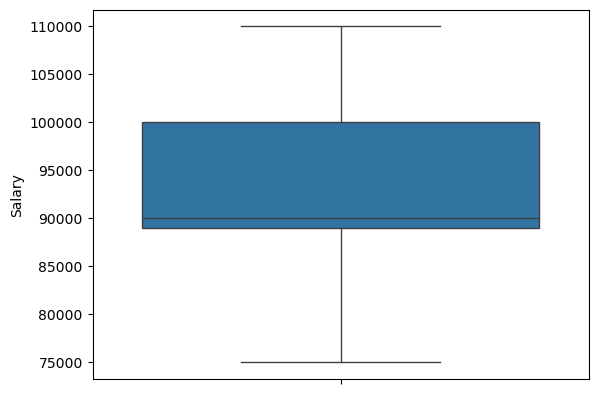

In [56]:
sns.boxplot(df2.Salary)

In [58]:
emp[(emp.Department == 'HR') | (emp.Department == 'IT')]

,Serial,Emp_ID,Designation,Department,Age,Salary,bonus,Bonus2
1,2,1107,Officer,IT,30.0,80000.0,12000.0,8000.0
2,3,1203,Officer,HR,28.0,90000.0,NaN,NaN
3,4,1005,Manager,HR,45.0,120000.0,30000.0,12000.0
5,6,2451,Accountant,IT,34.0,100000.0,25000.0,10000.0
7,8,1001,Officer,IT,25.0,75000.0,11250.0,7500.0
8,9,1234,Manager,IT,23.0,90000.0,NaN,NaN
13,14,1098,Officer,IT,25.0,100000.0,25000.0,10000.0
14,15,2912,Officer,IT,31.0,90000.0,13500.0,9000.0
15,16,1222,Officer,IT,25.0,90000.0,NaN,NaN


# 4. sort by salary

In [63]:
emp.sort_values(by='Salary', ascending=False).head(5)

,Serial,Emp_ID,Designation,Department,Age,Salary,bonus,Bonus2
0,1,1101,Manager,Accounts,50.000000,200000.0,60000.0,100000.0
11,12,3214,Accountant,Account,49.000000,123000.0,30750.0,12300.0
3,4,1005,Manager,HR,45.000000,120000.0,30000.0,12000.0
6,7,1111,Accountant,Accounts,34.294118,110000.0,27500.0,11000.0
13,14,1098,Officer,IT,25.000000,100000.0,25000.0,10000.0


# 5. groupby

In [65]:
emp.groupby('Department')['Salary'].mean()

Department
Account       123000.000000
Accounts      100000.000000
HR            105000.000000
IT             89285.714286
Production     91750.000000
Name: Salary, dtype: float64

In [72]:
emp.groupby('Designation')['Department'].count()

Designation
Accountant    3
Engineer      3
Manager       3
Office Boy    2
Officer       7
Name: Department, dtype: int64

In [76]:
#Add a new column to the dataframe named Experience_Level, having values Seior for Age>=40 else Junio
emp['Experience_Level'] = emp['Age'].apply(lambda x: 'Senior' if x>=40 else 'Junior')

In [80]:
# List of employees in IT and Age < 40
emp.query("Department == 'IT' and Age<40")

,Serial,Emp_ID,Designation,Department,Age,Salary,bonus,Bonus2,Experience_Level
1,2,1107,Officer,IT,30.0,80000.0,12000.0,8000.0,Junior
5,6,2451,Accountant,IT,34.0,100000.0,25000.0,10000.0,Junior
7,8,1001,Officer,IT,25.0,75000.0,11250.0,7500.0,Junior
8,9,1234,Manager,IT,23.0,90000.0,NaN,NaN,Junior
13,14,1098,Officer,IT,25.0,100000.0,25000.0,10000.0,Junior
14,15,2912,Officer,IT,31.0,90000.0,13500.0,9000.0,Junior
15,16,1222,Officer,IT,25.0,90000.0,NaN,NaN,Junior


In [84]:
#Emp_ID and Department and Salary of employees whose Age > 40
emp.loc[emp['Age']>40,['Emp_ID','Department','Salary']]

,Emp_ID,Department,Salary
0,1101,Accounts,200000.0
3,1005,HR,120000.0
9,2156,Production,89000.0
11,3214,Account,123000.0
12,2156,Production,89000.0
16,2156,Production,89000.0


In [86]:
#Rename Emp_ID to Employee_ID
emp.rename(columns={'Emp_ID' : 'Employee_ID'}, inplace=True)

In [90]:
#Change the following code to make it case insensitive
emp[emp.Designation.str.lower() == 'manager']

,Serial,Employee_ID,Designation,Department,Age,Salary,bonus,Bonus2,Experience_Level
0,1,1101,Manager,Accounts,50.0,200000.0,60000.0,100000.0,Senior
3,4,1005,Manager,HR,45.0,120000.0,30000.0,12000.0,Senior
8,9,1234,Manager,IT,23.0,90000.0,NaN,NaN,Junior


In [92]:
#Check if a department name contains "acc"
emp[emp.Department.str.contains('acc',  case=False)]

,Serial,Employee_ID,Designation,Department,Age,Salary,bonus,Bonus2,Experience_Level
0,1,1101,Manager,Accounts,50.000000,200000.0,60000.0,100000.0,Senior
4,5,2123,Office Boy,Accounts,27.000000,45000.0,4500.0,4500.0,Junior
6,7,1111,Accountant,Accounts,34.294118,110000.0,27500.0,11000.0,Junior
11,12,3214,Accountant,Account,49.000000,123000.0,30750.0,12300.0,Senior
17,18,2123,Office Boy,Accounts,27.000000,45000.0,4500.0,4500.0,Junior


# Find duplicates in dataframe

In [97]:
emp[emp.duplicated()]

,Serial,Employee_ID,Designation,Department,Age,Salary,bonus,Bonus2,Experience_Level


#  Remove Duplicates

In [100]:
emp.drop_duplicates(inplace=True)
emp.head(3)

,Serial,Employee_ID,Designation,Department,Age,Salary,bonus,Bonus2,Experience_Level
0,1,1101,Manager,Accounts,50.0,200000.0,60000.0,100000.0,Senior
1,2,1107,Officer,IT,30.0,80000.0,12000.0,8000.0,Junior
2,3,1203,Officer,HR,28.0,90000.0,NaN,NaN,Junior


In [108]:
# plt.figure(figsize=(10,6))
# sns.heatmap(emp.corr(), annot=True, cmap='Blues')
# plt.title('Correlation Heatmap')
# plt.show()